In [82]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import optimize
import umodel as unf

import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

# Number of bins per distribution
nBins = 2

# Observed data in each bin.
Ds = [np.array([90]*nBins), np.array([110]*nBins)]
Rs = [np.eye(nBins), np.eye(nBins)]

# Return the correlation matrix for a given rho
def corrMatrix(rho, r=1): 
    c = np.eye(2*nBins)                                                   
    for i in range(0, nBins):                                                    
        for j in range(0, nBins):                                                
            if i == j:                                                           
                c[i+nBins, j] = rho * (1-r)
                c[i, j+nBins] = rho * (1-r)
            else:
                c[i+nBins, j] = rho * r
                c[i, j+nBins] = rho * r
                
    return c

# Return a pair of reponse matrix
def respMatrices(rho):
    '''
    returns a pair of 2x2 matrices with the shape
    |  1-rho   rho  |
    |   rho   1-rho |
    '''
    r = np.zeros((nBins, nBins))
    r[0, 0] = 1 - rho
    r[1, 1] = 1 - rho
    r[0, 1] = rho
    r[1, 0] = rho
    return [r, r]

## Compare profile NLL for different correlation and reponse matrices


We adopt the following reponse matrix shape:
$$
r = \begin{pmatrix} 
1-\rho_1 & \rho_1 \\ 
\rho_1 & 1-\rho_1
\end{pmatrix}
$$

$$
\Sigma = \begin{pmatrix} 
1 & 0 & \rho_2 r &  \rho_2 (1-r)   \\ 
0 & 1 &   \rho_2 (1-r)  & \rho_2 r  \\ 
 \rho_2 r & \rho_2 (1-r) & 1 & 0 \\ 
\rho_2 (1-r) & \rho_2 r & 0 & 1 \\ 
\end{pmatrix}
$$

In [88]:
def plotNLL(rho_rp):
    '''
    Plot the profile NLL for each of the 4 bins, for different values
    of data correlation rho (rho2), for a given response matrix determined
    by rho_rp.
    '''
    
    # Compare profiled NLL for different correlation values
    colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'tab:purple'] * 10
    plt.figure(figsize=(15, 13))

    # Loop over bins
    for ib in range(4):
        plt.subplot(2, 2, ib+1)
        for r, c in zip(np.linspace(-1, 1, 8), colors):
            m = unf.model(Ds, respMatrices(rho_rp), corrMatrix(r, 0.5))
            bs, _ = m.unfold()
            bs = np.concatenate(bs)
            xMin = bs[ib] - 3*np.sqrt(bs[ib])
            xMax = bs[ib] + 3*np.sqrt(bs[ib])
            m.plotProfile(ib, xMin, xMax, 40, label='$\\rho_2=$' + '{:.1f}'.format(r), color=c)
        plt.xlabel('Truth Bin {}'.format(ib))
        plt.ylabel('NLL')
        
    plt.tight_layout();

## NLL v.s. correlation matrix only

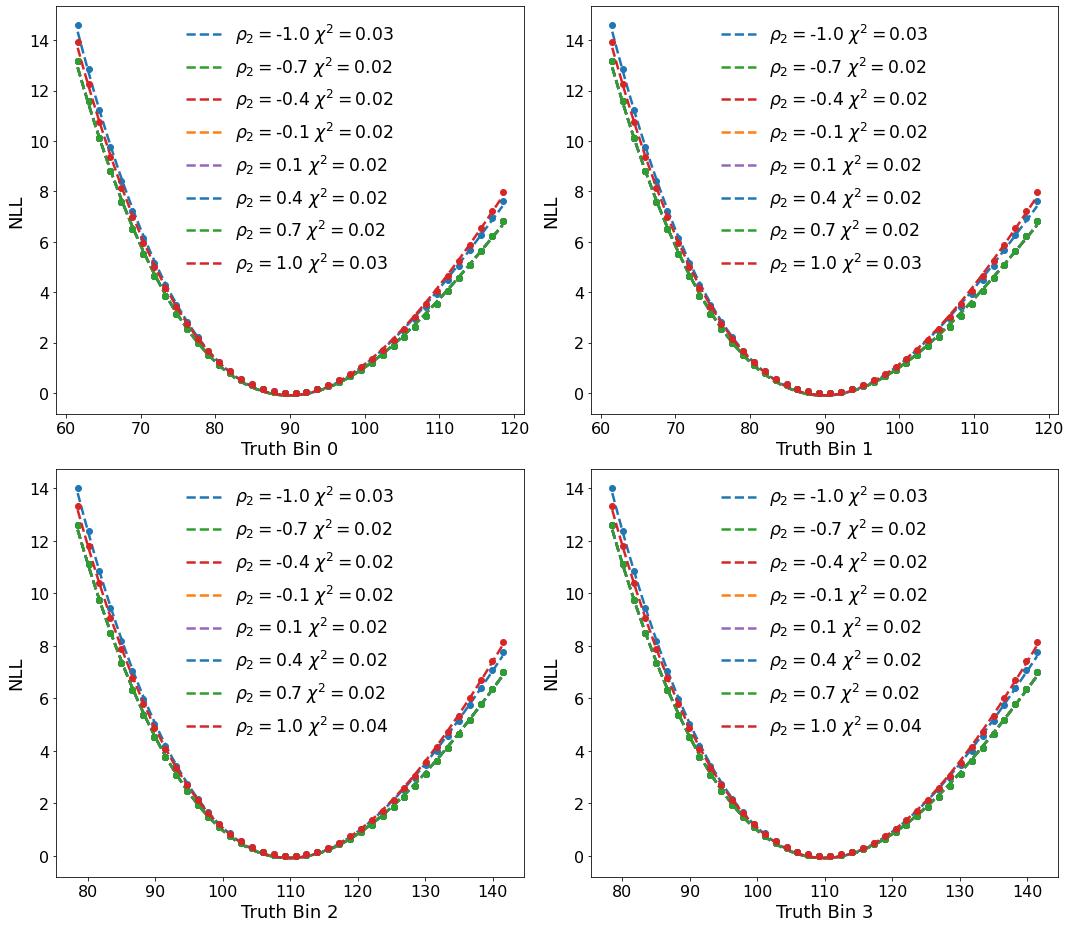

In [89]:
plotNLL(0)

## NLL v.s. correlation matrix only for different reponse matrices

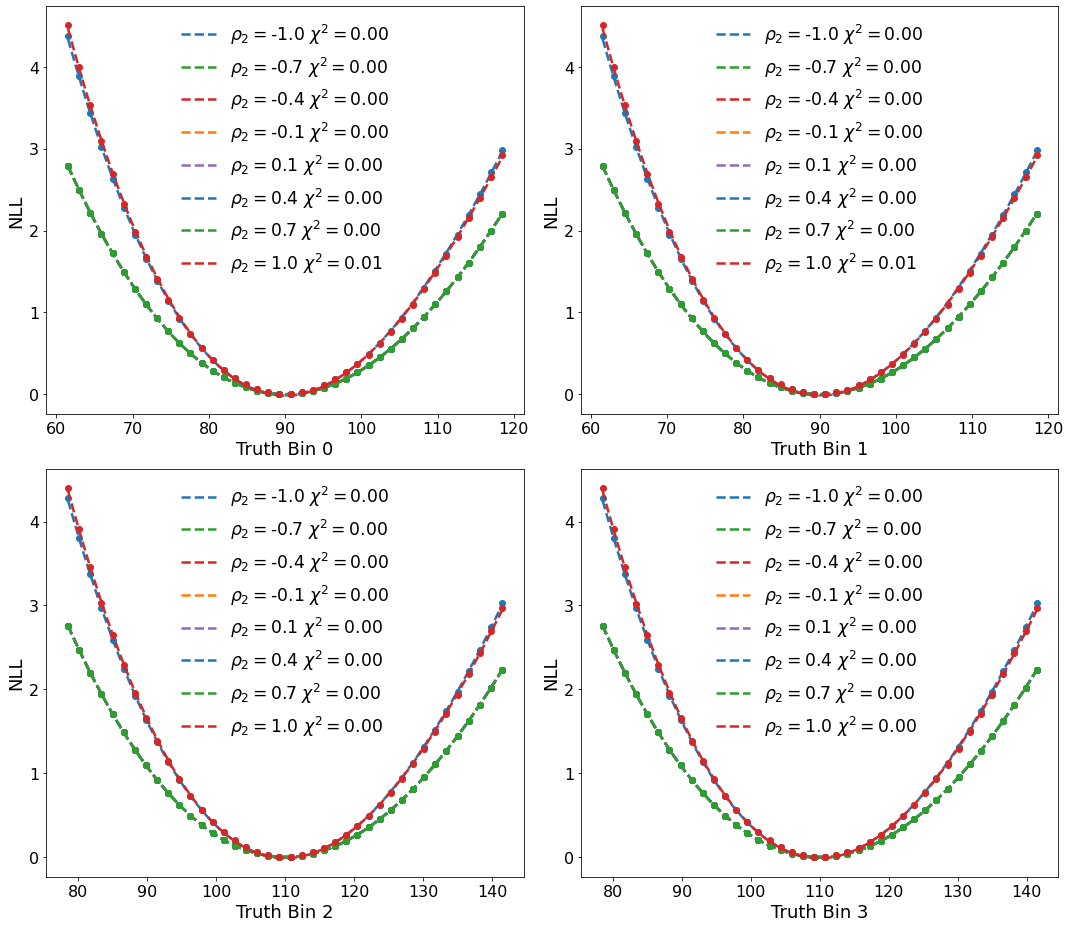

In [85]:
plotNLL(0.3)

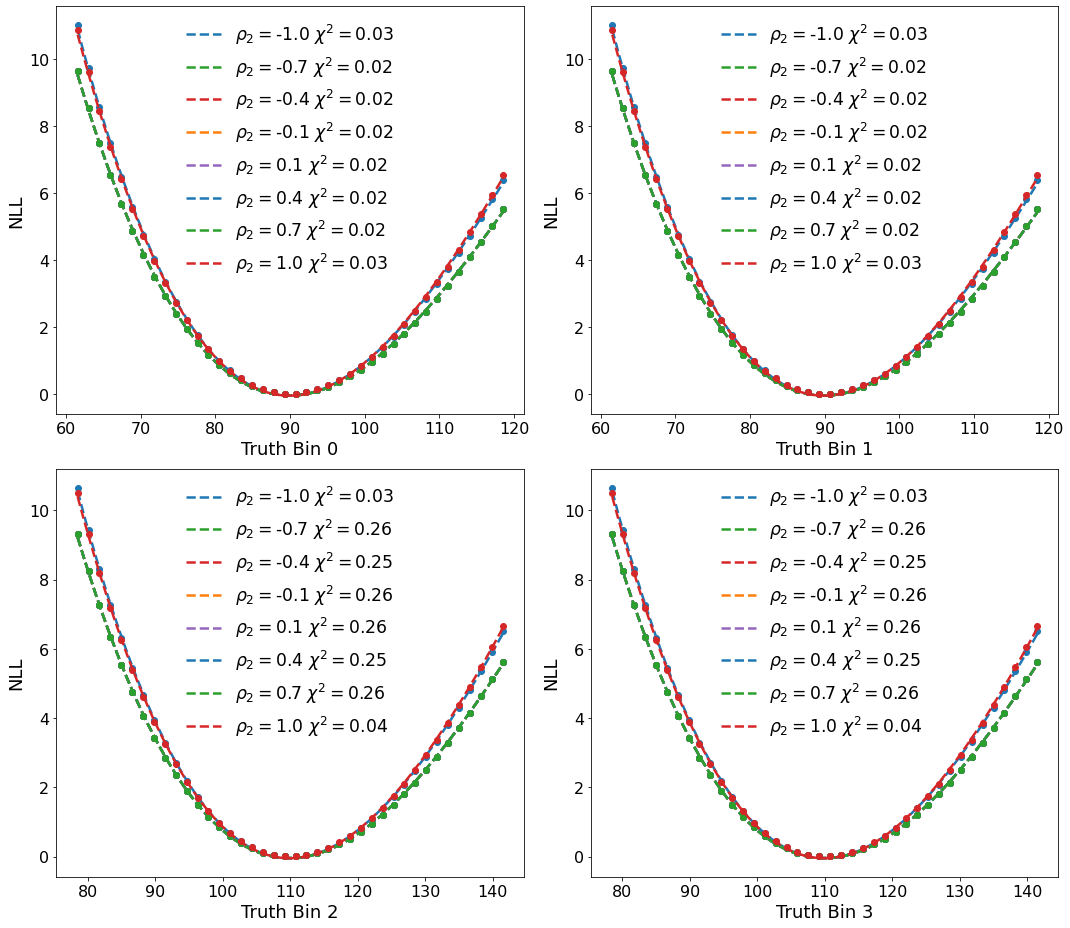

In [86]:
plotNLL(0.1)

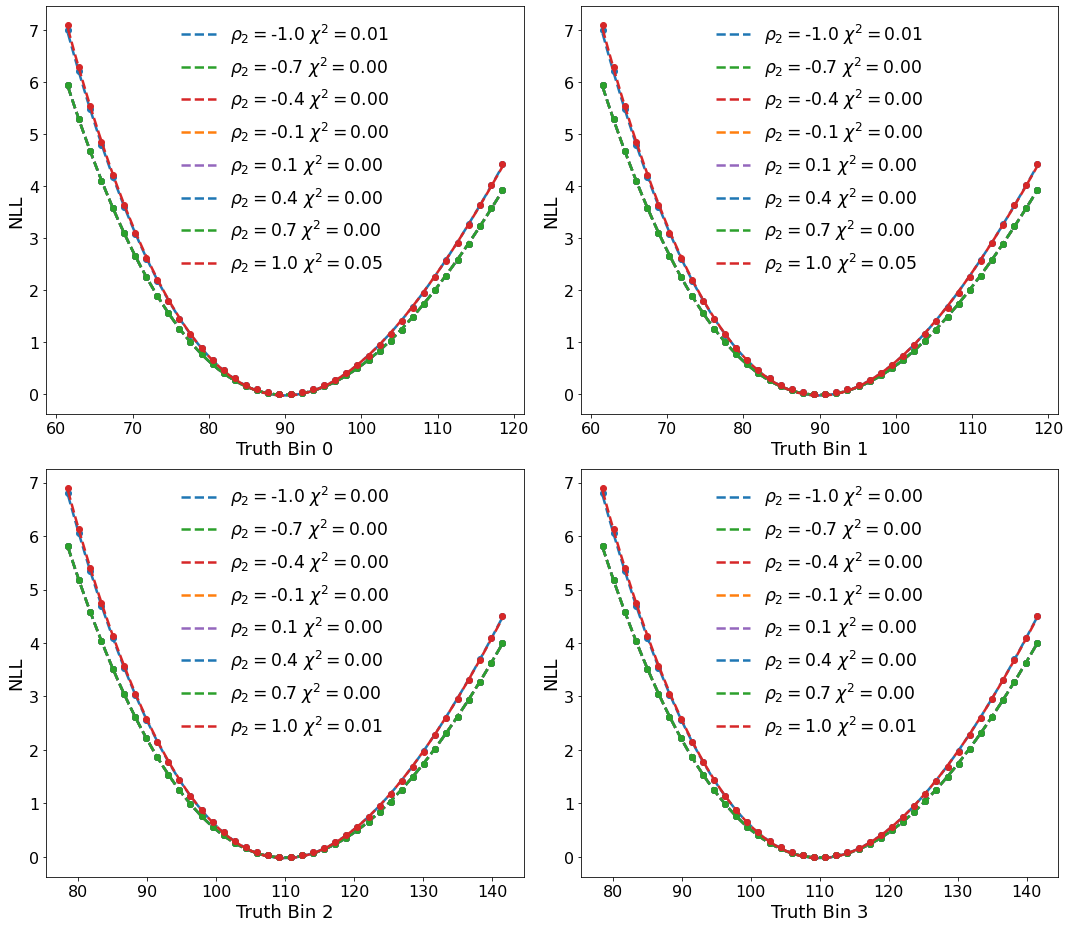

In [87]:
plotNLL(0.8)